In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

from apidata import (
    closing_prices,
    optimize_portfolio,
    backtest_portfolio,
    evaluate_portfolio,
)

In [2]:
selected_assets = "GOOG,JPM,FB".split(",")
a1, a2, a3 = selected_assets
selected_assets

['GOOG', 'JPM', 'FB']

In [3]:
portfolio = optimize_portfolio(selected_assets, 1000)
portfolio

[0] Retrieving Stock Data: GOOG
[1] Retrieving Stock Data: JPM
[2] Retrieving Stock Data: FB

Optimizing Portfolio Weights >> Simulations: x 1000

Optimized Portfolio Weights:
FB          0.8811
GOOG        0.0022
JPM         0.1166
Return      0.2177
Sharpe      0.4969
Variance    0.2409
Name: 145, dtype: float64


{'FB': 0.8811,
 'GOOG': 0.0022,
 'JPM': 0.1166,
 'Return': 0.2177,
 'Sharpe': 0.4969,
 'Variance': 0.2409}

In [4]:
performance = backtest_portfolio(portfolio)
performance.head(10)


Ticker: FB 	Portfolio Weight: 0.8811
                  FB
Date                
2014-01-03 -0.002468
2014-01-06  0.041683
2014-01-07  0.011022
2014-01-08  0.004703
2014-01-09 -0.015417

Ticker: GOOG 	Portfolio Weight: 0.0022
                    GOOG
Date                    
2014-03-28  6.019048e-06
2014-03-31 -1.189661e-05
2014-04-01  3.988616e-05
2014-04-02 -6.207237e-07
2014-04-03  1.060579e-05

Ticker: JPM 	Portfolio Weight: 0.1166
                 JPM
Date                
2014-01-03  0.000898
2014-01-06  0.000674
2014-01-07 -0.001352
2014-01-08  0.001094
2014-01-09 -0.000218

[Historic] Portfolio Performance:
                   FB          GOOG       JPM      RTNp
Date                                                  
2014-03-28 -0.013984  6.019048e-06  0.000233 -0.013744
2014-03-31  0.003371 -1.189661e-05  0.001294  0.004653
2014-04-01  0.034141  3.988616e-05 -0.000077  0.034104
2014-04-02  0.001406 -6.207237e-07 -0.000366  0.001040
2014-04-03 -0.046586  1.060579e-05  0.000347 -0.

,FB,GOOG,JPM,RTNp
Date,,,,
2014-03-28,-0.013984,6.019048e-06,0.000233,-0.013744
2014-03-31,0.003371,-1.189661e-05,0.001294,0.004653
2014-04-01,0.034141,3.988616e-05,-0.000077,0.034104
2014-04-02,0.001406,-6.207237e-07,-0.000366,0.001040
2014-04-03,-0.046586,1.060579e-05,0.000347,-0.046229
2014-04-04,-0.041562,-1.051886e-04,-0.001645,-0.043312
2014-04-07,0.003115,-2.030552e-05,-0.001590,0.001505
2014-04-08,0.018980,6.743129e-05,-0.000297,0.018751
2014-04-09,0.061686,3.633197e-05,0.000829,0.062552


In [17]:
def historic_standardized_performance(ticker, verbose=True):
    eod_prices = closing_prices(stock=ticker).set_index("Date")
    eod_prices["std_close"] = round(eod_prices[ticker]/eod_prices[ticker].iloc[0], 4) -1
    if verbose:
        print(eod_prices.head())
    return eod_prices

In [19]:
# Validate Data Type -- Series
portfolio_daily_returns = performance["RTNp"]
type(portfolio_daily_returns) is pd.core.series.Series

True

In [20]:
asset_1 = historic_standardized_performance(a1)
asset_2 = historic_standardized_performance(a2)
asset_3 = historic_standardized_performance(a3)

              GOOG  std_close
Date                         
2014-03-27  558.46     0.0000
2014-03-28  559.99     0.0027
2014-03-31  556.97    -0.0027
2014-04-01  567.16     0.0156
2014-04-02  567.00     0.0153
              JPM  std_close
Date                        
2014-01-02  58.21     0.0000
2014-01-03  58.66     0.0077
2014-01-06  59.00     0.0136
2014-01-07  58.32     0.0019
2014-01-08  58.87     0.0113
                FB  std_close
Date                         
2014-01-02  54.710     0.0000
2014-01-03  54.557    -0.0028
2014-01-06  57.200     0.0455
2014-01-07  57.920     0.0587
2014-01-08  58.230     0.0643


In [ ]:
asset1_performance = closing_prices(a1).set_index("Date")
print(asset1_performance.count())
asset1_performance["std_close"] = round(asset1_performance[a1]/asset1_performance[a1].iloc[0] -1, 4)
asset1_performance.head()

In [ ]:
asset2_performance = closing_prices(a2).set_index("Date")
print(asset2_performance.count())
asset2_performance["std_close"] = round(asset2_performance[a2]/asset2_performance[a2].iloc[0] -1, 4)
asset2_performance.head()

In [ ]:
asset3_performance = closing_prices(a3).set_index("Date")
print(asset3_performance.count())
asset3_performance["std_close"] = round(asset3_performance[a3]/asset3_performance[a3].iloc[0] -1, 4)
asset3_performance.head()

In [21]:
portfolio_daily_returns.head()

Date
2014-03-28   -0.013744
2014-03-31    0.004653
2014-04-01    0.034104
2014-04-02    0.001040
2014-04-03   -0.046229
Name: RTNp, dtype: float64

In [22]:
for d, rtn in portfolio_daily_returns.items():
    print(f'Date:{d} / %Change: {round(rtn * 100, 2)}%')

Date:2014-03-28 00:00:00 / %Change: -1.37%
Date:2014-03-31 00:00:00 / %Change: 0.47%
Date:2014-04-01 00:00:00 / %Change: 3.41%
Date:2014-04-02 00:00:00 / %Change: 0.1%
Date:2014-04-03 00:00:00 / %Change: -4.62%
Date:2014-04-04 00:00:00 / %Change: -4.33%
Date:2014-04-07 00:00:00 / %Change: 0.15%
Date:2014-04-08 00:00:00 / %Change: 1.88%
Date:2014-04-09 00:00:00 / %Change: 6.26%
Date:2014-04-10 00:00:00 / %Change: -5.1%
Date:2014-04-11 00:00:00 / %Change: -1.38%
Date:2014-04-14 00:00:00 / %Change: 0.47%
Date:2014-04-15 00:00:00 / %Change: 0.27%
Date:2014-04-16 00:00:00 / %Change: 1.04%
Date:2014-04-17 00:00:00 / %Change: -1.18%
Date:2014-04-21 00:00:00 / %Change: 3.33%
Date:2014-04-22 00:00:00 / %Change: 2.71%
Date:2014-04-23 00:00:00 / %Change: -2.32%
Date:2014-04-24 00:00:00 / %Change: -0.68%
Date:2014-04-25 00:00:00 / %Change: -4.8%
Date:2014-04-28 00:00:00 / %Change: -2.47%
Date:2014-04-29 00:00:00 / %Change: 3.23%
Date:2014-04-30 00:00:00 / %Change: 2.41%
Date:2014-05-01 00:00:00 / 

Date:2017-06-07 00:00:00 / %Change: 0.31%
Date:2017-06-08 00:00:00 / %Change: 1.05%
Date:2017-06-09 00:00:00 / %Change: -2.68%
Date:2017-06-12 00:00:00 / %Change: -0.7%
Date:2017-06-13 00:00:00 / %Change: 1.36%
Date:2017-06-14 00:00:00 / %Change: -0.28%
Date:2017-06-15 00:00:00 / %Change: -0.34%
Date:2017-06-16 00:00:00 / %Change: 0.44%
Date:2017-06-19 00:00:00 / %Change: 1.55%
Date:2017-06-20 00:00:00 / %Change: -0.43%
Date:2017-06-21 00:00:00 / %Change: 0.9%
Date:2017-06-22 00:00:00 / %Change: -0.31%
Date:2017-06-23 00:00:00 / %Change: 0.93%
Date:2017-06-26 00:00:00 / %Change: -0.8%
Date:2017-06-27 00:00:00 / %Change: -1.64%
Date:2017-06-28 00:00:00 / %Change: 1.78%
Date:2017-06-29 00:00:00 / %Change: -1.11%
Date:2017-06-30 00:00:00 / %Change: -0.01%
Date:2017-07-03 00:00:00 / %Change: -1.33%
Date:2017-07-05 00:00:00 / %Change: 1.25%
Date:2017-07-06 00:00:00 / %Change: -0.93%
Date:2017-07-07 00:00:00 / %Change: 1.6%
Date:2017-07-10 00:00:00 / %Change: 1.11%
Date:2017-07-11 00:00:00 /

In [29]:
def convert_daily_portfolio_value(daily_returns, verbose=True):
    data_type = type(daily_returns)
    if data_type is pd.core.series.Series:
        portfolio_start_value = 1
        eod_portfolio_values = [(0, portfolio_start_value)]
        
        for d, pct_return in daily_returns.items():
            daily_open_value = eod_portfolio_values[-1][1]
            daily_close_value = round(daily_open_value * (1 + pct_return), 6)
            eod_portfolio_values.append((d, daily_close_value))
            if verbose:
                print(f'date: {d},\t' 
                      f'open: {daily_open_value},\t'
                      f'%rtn: {round(pct_return, 6)}\t'
                      f'close: {daily_close_value}')
                
        portfolio_mkt_values = pd.DataFrame(eod_portfolio_values[1:], columns=["date","mkt_val"]).set_index("date")
        portfolio_mkt_values["std_close"] = portfolio_mkt_values["mkt_val"].apply(lambda x: x-1)
        return portfolio_mkt_values

In [30]:
portfolio_closing_values = convert_daily_portfolio_value(portfolio_daily_returns)
type(portfolio_closing_values)

date: 2014-03-28 00:00:00,	open: 1,	%rtn: -0.013744	close: 0.986256
date: 2014-03-31 00:00:00,	open: 0.986256,	%rtn: 0.004653	close: 0.990845
date: 2014-04-01 00:00:00,	open: 0.990845,	%rtn: 0.034104	close: 1.024637
date: 2014-04-02 00:00:00,	open: 1.024637,	%rtn: 0.00104	close: 1.025702
date: 2014-04-03 00:00:00,	open: 1.025702,	%rtn: -0.046229	close: 0.978285
date: 2014-04-04 00:00:00,	open: 0.978285,	%rtn: -0.043312	close: 0.935913
date: 2014-04-07 00:00:00,	open: 0.935913,	%rtn: 0.001505	close: 0.937322
date: 2014-04-08 00:00:00,	open: 0.937322,	%rtn: 0.018751	close: 0.954898
date: 2014-04-09 00:00:00,	open: 0.954898,	%rtn: 0.062552	close: 1.014628
date: 2014-04-10 00:00:00,	open: 1.014628,	%rtn: -0.050952	close: 0.962931
date: 2014-04-11 00:00:00,	open: 0.962931,	%rtn: -0.013822	close: 0.949622
date: 2014-04-14 00:00:00,	open: 0.949622,	%rtn: 0.004692	close: 0.954077
date: 2014-04-15 00:00:00,	open: 0.954077,	%rtn: 0.002663	close: 0.956618
date: 2014-04-16 00:00:00,	open: 0.956618

pandas.core.frame.DataFrame

In [31]:
print(portfolio_closing_values.count())
portfolio_closing_values.head()

mkt_val      1006
std_close    1006
dtype: int64


,mkt_val,std_close
date,,
2014-03-28,0.986256,-0.013744
2014-03-31,0.990845,-0.009155
2014-04-01,1.024637,0.024637
2014-04-02,1.025702,0.025702
2014-04-03,0.978285,-0.021715


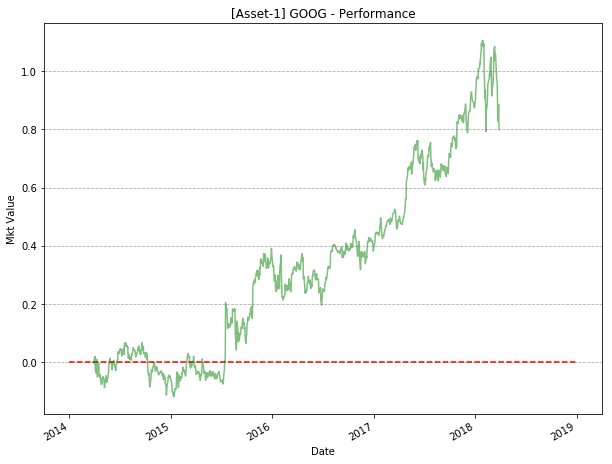

In [33]:
asset_1["std_close"].plot(color="green", alpha=0.5, figsize=(10, 8))
plt.grid(axis="y", linestyle="dashed")
plt.title(f"[Asset-1] {a1} - Performance")
plt.xlabel("Date")
plt.ylabel("Mkt Value")
plt.hlines(0, "2014-01", "2019-01", color="red", linestyle="dashed")

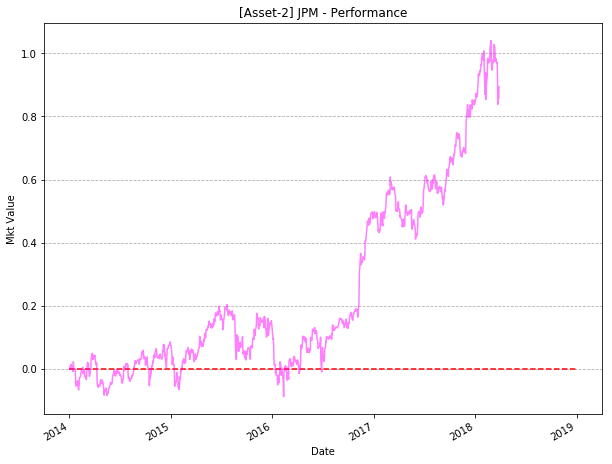

In [36]:
asset_2["std_close"].plot(color="magenta", alpha=0.5, figsize=(10, 8))
plt.grid(axis="y", linestyle="dashed")
plt.title(f"[Asset-2] {a2} - Performance")
plt.xlabel("Date")
plt.ylabel("Mkt Value")
plt.hlines(0, "2014-01", "2019-01", color="red", linestyle="dashed")

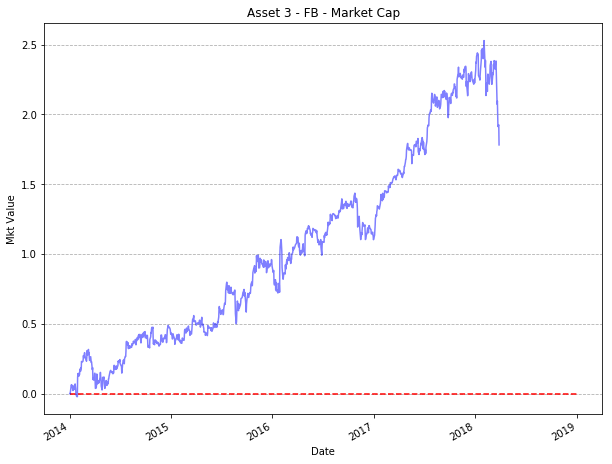

In [37]:
asset_3["std_close"].plot(color="blue", alpha=0.5, figsize=(10, 8))
plt.grid(axis="y", linestyle="dashed")
plt.title(f"Asset 3 - {a3} - Market Cap")
plt.xlabel("Date")
plt.ylabel("Mkt Value")
plt.hlines(0, "2014-01", "2019-01", color="red", linestyle="dashed")

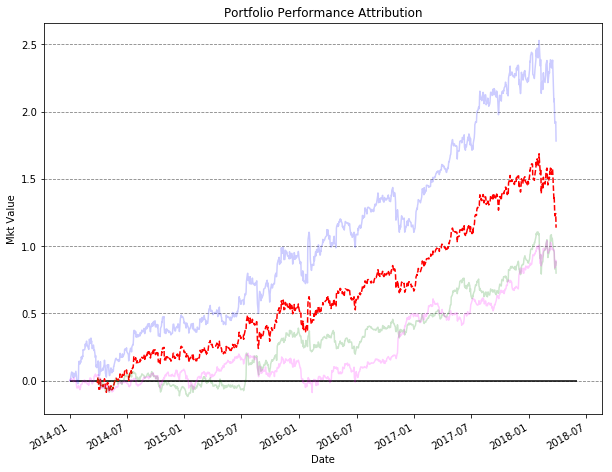

In [46]:
portfolio_closing_values["std_close"].plot(color="red", linestyle="dashed", figsize=(10, 8))
plt.plot(asset_1["std_close"], color="green", alpha=0.2)
plt.plot(asset_2["std_close"], color="magenta", alpha=0.2)
plt.plot(asset_3["std_close"], color="blue", alpha=0.2)
plt.grid(axis="y", linestyle="dashed", color="gray")
plt.title(f"Portfolio Performance Attribution")
plt.xlabel("Date")
plt.ylabel("Mkt Value")
plt.hlines(0, "2014-01", "2018-06", color="black", linestyle="solid")